```
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/'Colab Notebooks'/STS2011
```

# JACS 논문 Data를 활용한 화학 연구 동향의 분석

## Data의 가공

### database.sqlite
- Tables
    - Authors
        - authorID : index
        - title : author의 title - column 전체가 empty
        - forename
        - initials
        - surname
        - orcidID : author의 orcidID - column 전체가 empty
    - Paper_Authors
        - paperID
        - authorID
    - Papers
        - paperID : index
        - DOI : 논문의 DOI 정보
        - type : 논문의 성격
            - Article : 51%
            - Communication : 45%
            - Other : 4%
        - title : 논문의 제목
        - abstract : 논문의 abstract
        - volume : 논문이 개제된 journal의 volume #
        - issue : 논문이 개제된 journal의 issure #
        - startpg : 논문의 시작 page
        - endpg ; 논문의 마지막 page
        - received : 논문이 접수된 일자
        - publishedOnline : 논문의 온라인 공개 일자
        - publishedPrint : 논문의 인쇄 일자
        - authorChoiceOA
        - editorChoiceOA
        - views : 논문 조회수
        - citations : 논문 인용 횟수
        - scrapeDT : scrap된 날짜

In [1]:
import sqlite3
# SQL DataBase file에 access
# cursor를 이용한 접속
con = sqlite3.connect('./archive/database.sqlite')
cur = con.cursor()

In [2]:
# File 불러오기가 제대로 동작하는지 확인
try:
    print(list(cur.execute("SELECT forename FROM Authors"))[:5])
except:
    print("Something wrong happened while loading the file.")

[('Roberto',), ('Benedetto',), ('Bahman',), ('Maura',), ('James',)]


### SQL file을 DataFrame으로 불러오기

In [3]:
import pandas as pd
# SQL query로부터 dataframe의 생성
authors = pd.read_sql_query("SELECT * FROM Authors",con,index_col = 'authorID')
authors.head()

,title,forename,initials,surname,orcidID
authorID,,,,,
1,None,Roberto,,Pellicciari,None
2,None,Benedetto,,Natalini,None
3,None,Bahman,M.,Sadeghpour,None
4,None,Maura,,Marinozzi,None
5,None,James,P.,Snyder,None


In [4]:
authors.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 120670 entries, 1 to 120670
Data columns (total 5 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   title     0 non-null       object
 1   forename  120670 non-null  object
 2   initials  120670 non-null  object
 3   surname   120670 non-null  object
 4   orcidID   0 non-null       object
dtypes: object(5)
memory usage: 5.5+ MB


'title', 'orcidID' column은 non-null count가 0임을 확인, 불필요한 정보임을 알 수 있음

In [5]:
# DataFrame으로부터 불필요한 column의 삭제
authors = authors.drop(columns=['title','orcidID'])
authors.head()

,forename,initials,surname
authorID,,,
1,Roberto,,Pellicciari
2,Benedetto,,Natalini
3,Bahman,M.,Sadeghpour
4,Maura,,Marinozzi
5,James,P.,Snyder


In [6]:
authors.to_csv('authors.csv',sep='\t')

In [7]:
papers = pd.read_sql_query("SELECT * FROM Papers",con,index_col = 'paperID')
papers.head()

,DOI,type,title,abstract,volume,issue,startpg,endpg,received,publishedOnline,publishedPrint,authorChoiceOA,editorChoiceOA,views,citations,scrapeDT
paperID,,,,,,,,,,,,,,,,
1,10.1021/ja950971s,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,Cyclic ethyl 2-diazo-3-hydroxy carboxylates we...,1,118,1,12,1995-03-24 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,1872,59,2017-07-06 23:29:12.618347
2,10.1021/ja950133y,Article,Absolute Kinetics of Aminium Radical Reactions...,Photolysis of N-nitrosamines in acidic acetoni...,1,118,13,19,1995-01-17 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,979,41,2017-07-06 23:29:07.395517
3,10.1021/ja952003v,Article,Solvent Dependent Leaving Group Fluorine Kinet...,Fluorine kinetic isotope effects (F KIEs) have...,1,118,20,23,1995-06-20 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,481,23,2017-07-06 23:28:25.790125
4,10.1021/ja951686b,Article,XAS Structural Comparisons of Reversibly Inter...,In this study on model compounds for the iron\...,1,118,24,34,1995-05-24 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,456,61,2017-07-06 23:29:07.943408
5,10.1021/ja952470c,Article,Toward an Understanding of the High Enantiosel...,A systematic study of the possible diastereome...,1,118,35,42,1995-07-24 00:00:00.000000,1996-01-10 00:00:00.000000,1996-01-01 00:00:00.000000,0,0,769,52,2017-07-06 23:28:53.729800


In [8]:
# 필요한 정보만을 추출하여 papers DataFrame을 재생성
papers = papers[['type','title','volume','issue','views','citations','publishedOnline']]
papers.head()

,type,title,volume,issue,views,citations,publishedOnline
paperID,,,,,,,
1,Article,The Reaction of α-Diazo-β-hydroxy Esters with ...,1,118,1872,59,1996-01-10 00:00:00.000000
2,Article,Absolute Kinetics of Aminium Radical Reactions...,1,118,979,41,1996-01-10 00:00:00.000000
3,Article,Solvent Dependent Leaving Group Fluorine Kinet...,1,118,481,23,1996-01-10 00:00:00.000000
4,Article,XAS Structural Comparisons of Reversibly Inter...,1,118,456,61,1996-01-10 00:00:00.000000
5,Article,Toward an Understanding of the High Enantiosel...,1,118,769,52,1996-01-10 00:00:00.000000


In [9]:
papers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59467 entries, 1 to 59467
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   type             59467 non-null  object
 1   title            59467 non-null  object
 2   volume           59467 non-null  int64 
 3   issue            59467 non-null  int64 
 4   views            59467 non-null  int64 
 5   citations        59467 non-null  int64 
 6   publishedOnline  59467 non-null  object
dtypes: int64(4), object(3)
memory usage: 3.6+ MB


In [10]:
papers.to_csv('papers.csv',sep='\t')

In [11]:
# volumne별 개재된 논문 수의 확인
a = papers['volume'].value_counts().sort_index()
a[:10]

1     1292
2     1115
3      973
4     1190
5     1200
6     1249
7     1163
8     1156
9     1227
10    1229
Name: volume, dtype: int64

(500.0, 1500.0)

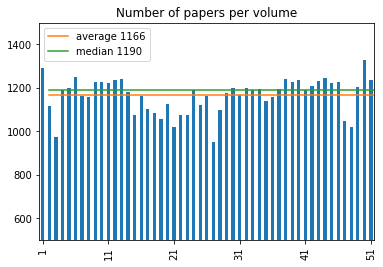

In [12]:
import matplotlib.pyplot as plt
%matplotlib inline
a.plot(kind = 'bar', label = '_nolegend_')
plt.plot([1,51],[a.mean(),a.mean()],color = 'C1',label = 'average %d' % a.mean())
plt.plot([1,51],[a.median(),a.median()],color = 'C2',label = 'median %d' % a.median())
plt.title('Number of papers per volume'); plt.legend(); plt.xticks(range(0,51,10)); plt.ylim(500,1500)

Volume별 논문 수는 큰 차이가 없음

### Paper의 출간 년도 추출
- papers의 publishedOnline은 출간 년도가 문자열 형식으로 저장되어 있음.
- RegEx를 이용해 출간 년도를 추출

In [13]:
sample = papers['publishedOnline'][420]
sample

'1996-03-13 00:00:00.000000'

In [14]:
import re
pat = re.compile('\d{4}(?=[-])')
int(pat.match(sample).group())

1996

### Author, Paper Class의 생성

Author와 Paper class는 별도의 file에 생성

In [15]:
%%writefile Author.py
class Author:
    def __init__(self,authorID,forename,initials,surname):
        self._authorID = authorID
        self._forename = forename
        self._initials = initials
        self._surname = surname
        self._fullname = Author.getFullName(forename,initials,surname)
        self._papers = []
        
    @staticmethod
    def getFullName(forename,initials,surname):
        return ' '.join([forename,initials,surname])
    
    def printInfo(self):
        fmt = 'authorID : {}\nforename: {}\ninitials: {}\nsurname: {}\nfullname: {}'
        print(fmt.format(self._authorID,self._forename,self._initials,self._surname,self._fullname))

    def printPapers(self):
        for i in self._papers:
            print(i.title)
        
    def __str__(self):
        return self._fullname
    
    @property
    def authorID(self):
        return self._authorID
    
    @property
    def forename(self):
        return self._forename
    
    @property
    def initials(self):
        return self._initals
    
    @property
    def surname(self):
        return self._surname
    
    @property
    def fullname(self):
        return self._fullname
    
    @property
    def papers(self):
        return self._papers
    
    @authorID.setter
    def authorID(self,para):
        self._authorID = para
        
    @forename.setter
    def forename(self,para):
        self._forename = para
        
    @initials.setter
    def initials(self,para):
        self._initals = para
        
    @surname.setter
    def surname(self,para):
        self._surname = para
        
    @fullname.setter
    def fullname(self,para):
        self._fullname = para
        
    @papers.setter
    def papers(self,para):
        self._papers = para

Overwriting Author.py


In [16]:
%%writefile Paper.py
import re
pat = re.compile('\d{4}(?=[-])')
class Paper:
    def __init__(self,paperID,type,title,volume,issue,views,citations,year):
        self._paperID = paperID
        self._type = type
        self._title = title
        self._volume = volume
        self._issue = issue
        self._views = views
        self._citations = citations
        self._authors = []
        self._year = int(pat.match(year).group())
        
    def printInfo(self):
        fmt = 'paperID: {}\ntitle: {}\ntype: {}\nyear: {}\nvolume: {}\nissue: {}\nviews: {}\ncitations: {}'
        print(fmt.format(self._paperID,self._title,self._type,self._year,self._volume,self._issue,self._views,self._citations))

    def printAuthors(self):
        for i in self._authors:
            print(i.fullname)
        
    def __str__(self):
        return self._title
        
    @property
    def paperID(self):
        return self._paperID
    
    @property
    def type(self):
        return self._type
    
    @property
    def title(self):
        return self._title
    
    @property
    def volume(self):
        return self._volume
    
    @property
    def issue(self):
        return self._issue
    
    @property
    def views(self):
        return self._views
    
    @property
    def citations(self):
        return self._citations
    
    @property
    def authors(self):
        return self._authors
    
    @property
    def year(self):
        return self._year
    
    @paperID.setter
    def paperID(self,para):
        self._paperID = para
        
    @type.setter
    def type(self,para):
        self._type = para
        
    @title.setter
    def title(self,para):
        self._title = para
        
    @volume.setter
    def volume(self,para):
        self._volume = para
        
    @issue.setter
    def issue(self,para):
        self._issue = para
        
    @views.setter
    def views(self,para):
        self._views = para
        
    @citations.setter
    def citations(self,para):
        self._citations = para
        
    @authors.setter
    def authors(self,para):
        self._authors = para
        
    @year.setter
    def year(self,para):
        self._year = para

Overwriting Paper.py


import를 통해 두개의 class 불러오기

In [17]:
from Author import Author
from Paper import Paper

Author object를 생성하여 authorList로 저장

In [18]:
authorList = []
for i in range(authors.shape[0]):
    authorList.append(Author(i+1,authors.iloc[i,0],authors.iloc[i,1],authors.iloc[i,2]))

In [19]:
paperList = []
for i in range(papers.shape[0]):
    paperList.append(Paper(i+1,papers.iloc[i,0],papers.iloc[i,1],papers.iloc[i,2],papers.iloc[i,3],papers.iloc[i,4],papers.iloc[i,5],papers.iloc[i,6]))

In [20]:
# __str__(self) 적용시 author의 fullname을 return
print(authorList[333])

Paul G. Wenthold


In [21]:
# author 정보를 print하는 함수 printInfo()
authorList[333].printInfo()

authorID : 334
forename: Paul
initials: G.
surname: Wenthold
fullname: Paul G. Wenthold


In [22]:
paperList[333].printInfo()

paperID: 334
title: Polyrotaxane Containing a Blocking Group in Every Structural Unit of the Polymer Chain. Direct Synthesis of Poly(alkylenebenzimidazole) Rotaxane from Ru Complex-Catalyzed Reaction of 1,12-Dodecanediol and 3,3‘-Diaminobenzidine in the Presence of Cyclodextrin
type: Communication
year: 1996
volume: 7
issue: 118
views: 401
citations: 62


### Author와 Paper를 Matching하는 함수 getPaper, getAuthor

Author table과 Paper table을 연결하는 Paper_Author table 불러오기

In [23]:
con = sqlite3.connect('./archive/database.sqlite')
cur = con.cursor()
authorPaper = pd.read_sql_query("SELECT * FROM Paper_Authors",
                                    sqlite3.connect('./archive/database.sqlite'))
authorPaper.head()

,paperID,authorID
0,1,1
1,1,2
2,1,3
3,1,4
4,1,5


In [24]:
# 함수 실행시간 측정을 위한 decorator checkTime
import time
class checkTime:
    def __init__(self,func):
        self.func = func
    def __call__(self,*args,**kwargs):
        startTime = time.time()
        returnval = self.func(*args,**kwargs)
        endTime = time.time()
        print(f"Execution time of function {self.func.__name__}: %.3f" % (endTime-startTime))
        return returnval

In [25]:
# Author object의 _papers에 정보를 처리하는 함수 getPapers
def getPapers(Author):
    for i in authorPaper[authorPaper.authorID == Author.authorID].paperID:
        Author.papers.append(paperList[i-1])

In [26]:
# Paper object의 _authors에 정보를 추가하는 함수 getAuthors
def getAuthors(Paper):
    for i in authorPaper[authorPaper.paperID == Paper.paperID].authorID:
        Paper.authors.append(authorList[i-1])

In [27]:
@checkTime
def process():
    for author in authorList:
        getPapers(author)
    for paper in paperList:
        getAuthors(paper)

process()

Execution time of function process: 226.154


함수 실행시간이 길기 때문에, list를 binary file로 저장 후 재사용

In [28]:
import pickle
try:
    pickle.dump(authorList,open('./authorList.dat','wb'))
    pickle.dump(paperList,open('./paperList.dat','wb'))
except RecursionError:
    print("An RecursionError Occured : Your files aren't saved. Proceed with care.")
    # 컴퓨터 환경에 따라 대용량의 file 저장 불가능할 수 있음

An RecursionError Occured : Your files aren't saved. Proceed with care.


In [29]:
# papers 속성은 paper object를 원소로 가짐
authorList[333].papers

In [30]:
authorList[333].printPapers()

Photoelectron Spectroscopy of the Trimethylene- methane Negative Ion. The Singlet−Triplet Splitting of Trimethylenemethane
Ultraviolet Photoelectron Spectroscopy of Some C7H7- Isomers:  Quadricyclanide, Norbornadienide, Cycloheptatrienide, and 1,6-Heptadiynide
o-, m-, and p-Benzyne Negative Ions in the Gas Phase:  Synthesis, Authentication, and Thermochemistry
Photoelectron Spectroscopy of m-Xylylene Anion
Dehydrocyclooctatetraene. Photoelectron Spectroscopy of the C8H6 Anion
Experimental and Computational Studies of the Structures and Energetics of Cyclooctatetraene and Its Derivatives
Ultraviolet Photoelectron Spectroscopy of the o-, m-, and p-Benzyne Negative Ions. Electron Affinities and Singlet−Triplet Splittings for o-, m-, and p-Benzyne
A Density Functional Molecular Orbital Study of the C2−C7 and C2−C6 Cyclization Pathways of 1,2,4-Heptatrien-6-ynes. The Role of Benzannulation
Bond Dissociation Energy in Trifluoride Ion
Synthesis, Characterization, and Reactivity of the m-Xylyl

In [31]:
# authors 속성은 author object를 원소로 가짐
paperList[333].authors

In [32]:
paperList[333].printAuthors()

Isao  Yamaguchi
Kohtaro  Osakada
Takakazu  Yamamoto


## Data의 분석
### 논문의 type에 따라 참여한 작성자 수에 따른 차이가 있을까?

In [33]:
# 논문의 종류에 따른 수 확인
papers['type'].value_counts()

Article                     30253
Communication               26919
Book Review                  1324
Addition/Correction           535
Spotlights                    254
Perspective                    93
Computer Software Review       49
Editorial                      39
Retraction                      1
Name: type, dtype: int64

<AxesSubplot:>

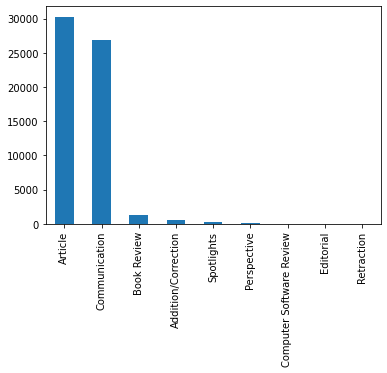

In [34]:
papers['type'].value_counts().plot(kind = 'bar')

Article 및 Communication으로 분류된 논문이 압도적으로 많음
<br>> Article과 Communication을 제외한 종류를 Other로 처리

In [35]:
papers['type'] = [i if i in ['Article','Communication'] else 'Others'
                    for i in papers['type']]

<AxesSubplot:>

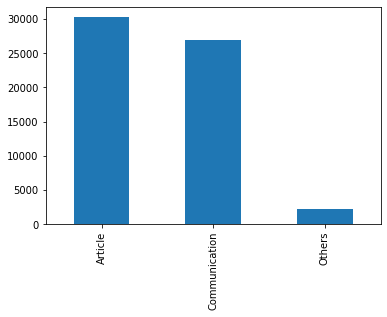

In [36]:
papers['type'].value_counts().plot(kind = 'bar')

한 논문을 작성하는데 참여한 연구자의 수의 분포 확인

<AxesSubplot:>

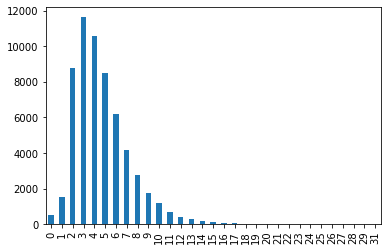

In [37]:
from collections import Counter
pd.Series(Counter(len(paper.authors) for paper in paperList)).sort_index().plot(kind = 'bar')

논문의 type별로 계산

In [38]:
counts = pd.Series(Counter((paper.type if paper.type in ['Article','Communication'] else 'Others', len(paper.authors))
        for paper in paperList), index = None)
counts = counts.sort_index()
counts

Article  0        5
         1      224
         2     4039
         3     5282
         4     5341
               ... 
Others   13       3
         14       1
         15       2
         16       4
         18       1
Length: 73, dtype: int64

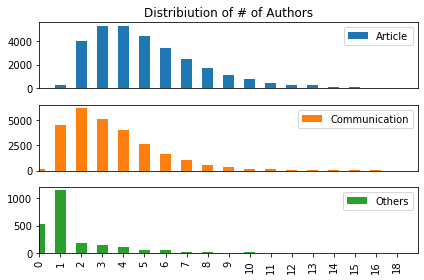

In [39]:
ax1 = plt.subplot(3,1,1)
counts['Article'].plot(kind = 'bar', color = 'C0',label = 'Article')
plt.xlim([0,18]);plt.xticks([]);plt.legend();plt.title("Distribiution of # of Authors")
ax2 = plt.subplot(3,1,2)
counts['Communication'].plot(kind = 'bar', color = 'C1', label = 'Communication')
plt.xlim([0,18]);plt.xticks([]);plt.legend()
ax3 = plt.subplot(3,1,3)
counts['Others'].plot(kind = 'bar', color = 'C2', label = 'Others')
plt.xlim([0,18]); plt.legend()
plt.tight_layout()

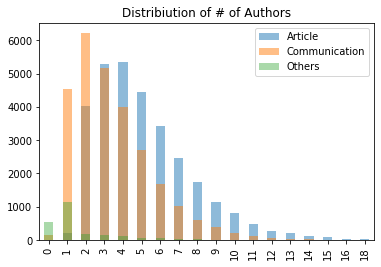

In [40]:
plt.title("Distribiution of # of Authors")
counts['Article'].plot(kind = 'bar', color = 'C0',alpha = 0.5,label = 'Article')
counts['Communication'].plot(kind = 'bar', color = 'C1', alpha = 0.5, label = 'Communication')
counts['Others'].plot(kind = 'bar', color = 'C2', alpha = 0.4, label = 'Others')
plt.legend()

Article이 일반적으로 Communication보다 더 많은 연구자가 참여함을 확인할 수 있음

### 저명한 화학자는 어떤 주제에 관심을 가질까?

- '저명한 화학자'에 대한 정의
    - 논문의 citation 수에 대한 표준화 필요
    - (Author의 총 citation) / (Author가 출간한 논문 수) : 평균 citation으로 새롭게 정의

In [41]:
renowned = pd.Series([int(sum(paper.citations for paper in author.papers)/len(author.papers)) for author in authorList],
                    index = authors.index)
renowned = renowned.sort_values(ascending = False)
renowned[:10]

authorID
6275     5442
14806    4190
3749     3085
54507    2629
32043    2201
41192    1970
41195    1970
53316    1967
53318    1967
18179    1954
dtype: int64

In [42]:
# 논문 1편당 citation수가 가장 높은 화학자 50인의 list
renownedAuthor = [authorList[i-1] for i in renowned[:50].index]

In [43]:
for count, author in enumerate(renownedAuthor):
    if count == 10: break
    print(author,author.authorID,len(author.papers))

David S. Maxwell 6275 1
Jianglin  Feng 14806 1
Christoph  Maerker 3749 1
Ivan H. El-Sayed 54507 1
Scott K. Spear 32043 1
Simone  Raoux 41192 1
Guanxiong  Li 41195 1
Guido  Viscardi 53316 1
Bessho  Takeru 53318 1
László v. Szentpály 18179 1


renownedAuthor의 출력 결과를 살펴보았을 때,
author가 논문이 1편밖에 되지 않는데 높은 renowned 수치를 갖는 경우가 대부분임을 확인할 수 있음.<br>
이에 결과의 신뢰성이 부족하다 판단하여 최소 논문 10편에 참여한 학자만으로 다시 list를 생성하기로 함.<br>

<br>
어느정도의 크기를 갖는 표본을 확보하고자, 검색 대상 수를 10000으로 설정하였음.

In [44]:
renownedAuthor = [authorList[i-1] for i in renowned[:10000].index
                                  if len(authorList[i-1].papers) >= 10]
len(renownedAuthor)

205

In [45]:
print('AuthorID\tforename\t\t\t# of papers')
for idx,author in enumerate(renownedAuthor):
    if idx == 10:break
    print(f'{author.authorID:<8}\t{author.fullname:30}\t{len(author.papers)}')

AuthorID	forename			# of papers
71881   	Yongye  Liang                 	13
6276    	Julian  Tirado-Rives          	10
22048   	Xiaohua  Huang                	10
14807   	Bradley F. Chmelka            	12
64164   	Hailiang  Wang                	19
10355   	Xiaogang  Peng                	37
27213   	Hongjie  Dai                  	47
5595    	Jaheon  Kim                   	14
21291   	Akihiko  Kudo                 	11
242     	O. M. Yaghi                   	14


renownedAuthor에 포함된 author의 paper의 title을 추출,
이때 문법어를 제외시키기 위해 nltk의 stopwords를 사용.

In [46]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('english')
stopwords[:10]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rkdqj\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [47]:
words = [words.lower() for author in renownedAuthor
                       for paper in author.papers
                       for words in paper.title.split()
                       if words.lower() not in stopwords]
words[:5]

['development', 'new', 'semiconducting', 'polymers', 'high']

Counter을 이용해 높은 빈도를 보이는 단어를 확인.

In [48]:
frequentWords = Counter(words)
frequentWords.most_common(10)

[('synthesis', 495),
 ('highly', 253),
 ('carbon', 226),
 ('via', 209),
 ('organic', 207),
 ('cells', 190),
 ('solar', 188),
 ('nanoparticles', 183),
 ('mesoporous', 176),
 ('molecular', 164)]

<AxesSubplot:>

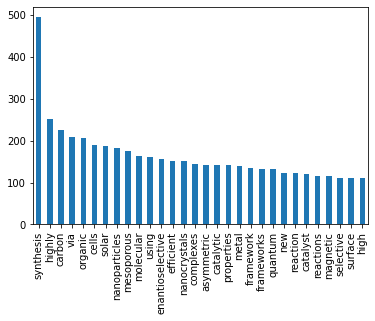

In [49]:
pd.Series(frequentWords).sort_values(ascending = False)[:30].plot(kind = 'bar')

상위 빈도 keyword 30개를 확인

In [50]:
print('\n'.join(i[0] for i in frequentWords.most_common(30)))

synthesis
highly
carbon
via
organic
cells
solar
nanoparticles
mesoporous
molecular
using
enantioselective
efficient
nanocrystals
complexes
asymmetric
properties
catalytic
metal
framework
quantum
frameworks
new
reaction
catalyst
reactions
magnetic
surface
selective
high


출력 결과에서 의미를 갖는 단어들을 추출할 경우 다음과 같은 list를 얻을 수 있음.
- synthesis (합성)
- carbon (탄소)
- organic (유기)
- solar (태양광)
- nanoparticles (나노입자)
- mesoporous (다공성의)
- complexes (복합체)
- nanocrystals (나노 결정)
- assymetric (비대칭의)
- catalytic (촉매의)
- enantioselective (거울상 선택성)
- surface (계면)
- quantum (양자)
- polymer (고분자)
- catalyst (촉매)
- nanotuebs (나노튜브)

bi-gram을 분석하였을 경우에 유사한 결과를 보이는지 확인

In [51]:
frequentBiGrams = Counter([(words[i],words[i+1]) for i in range(len(words)-1)])
frequentBiGrams.most_common(10)

[(('solar', 'cells'), 140),
 (('carbon', 'nanotubes'), 72),
 (('quantum', 'dots'), 59),
 (('dye-sensitized', 'solar'), 53),
 (('single-walled', 'carbon'), 49),
 (('metal–organic', 'framework'), 44),
 (('metal–organic', 'frameworks'), 43),
 (('mesoporous', 'silica'), 39),
 (('metal−organic', 'frameworks'), 38),
 (('highly', 'efficient'), 34)]

<AxesSubplot:>

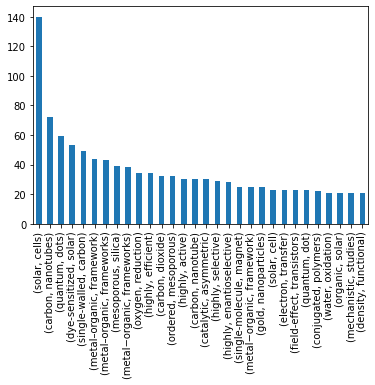

In [52]:
pd.Series(frequentBiGrams).sort_values(ascending = False)[:30].plot(kind = 'bar')

In [53]:
print('\n'.join(i[0]+' '+i[1] for i,_ in frequentBiGrams.most_common(15)))

solar cells
carbon nanotubes
quantum dots
dye-sensitized solar
single-walled carbon
metal–organic framework
metal–organic frameworks
mesoporous silica
metal−organic frameworks
highly efficient
oxygen reduction
carbon dioxide
ordered mesoporous
highly active
carbon nanotube


의미를 갖는 keyword를 추출할경우 다음과 같음.
- solar cells (태양광 전지)
    - dye-sensitized solar cells
- carbon nanotubes (탄소 나노튜브)
    - single-walled carbon nanotube
- metal-organic framework (유기금속 framework)
- mesoporous silica (다공성 실리카)
    - ordered mesopoous silica
- oxygen reduction (산소 환원)
- carbon dioxide (이산화탄소)
- highly efficient, higly active

uni-gram 및 bi-gram 분석 결과를 통해 저명한 화학자가 관심을 갖는 분야에 대한 정보를 확인할 수 있었음.
<br>저명한 화학자들이 관심 갖는 분야에 관한 논문에 대한 빈도 비교

In [54]:
keywords = ['solar cell','carbon nanotube','metal–organic framework','mesoporous silica']

In [55]:
keywordCount = Counter(keyword for keyword in keywords
                               for title in papers.iloc[:,1].values
                               if keyword in title.lower())
keywordCount

Counter({'solar cell': 314,
         'carbon nanotube': 576,
         'metal–organic framework': 313,
         'mesoporous silica': 119})

sorlar cell이 carbon nanotube보다도 논문 수가 적지만 높은 빈도를 나타내는 것을 보아 소수의 논문이 높은 인용수를 가진다고 추측할 수 있음.

### Chemistry Issue Tracking

paper에 등록된 year 별로 keyword를 분석하여 chemical bigram of the year를 선정할 수 있음

In [56]:
biOfYear = {i:[] for i in range(1996,2017)} # bigram을 보관할 dict 생성

In [57]:
for i in range(1996,2017):
    for paper in paperList:
        if paper.year == i:
            words = [word for word in paper.title.split()
                          if word not in stopwords]
            biOfYear[i].extend([(words[j].lower(),words[j+1].lower()) for j in range(len(words)-1)])

In [58]:
biOfYear[2012][:10]

[('jacs', 'spotlights—highlights'),
 ('spotlights—highlights', 'recent'),
 ('recent', 'publications'),
 ('publications', 'journal'),
 ('spotlights', 'recent'),
 ('recent', 'jacs'),
 ('jacs', 'publications'),
 ('spherical', 'nucleic'),
 ('nucleic', 'acids'),
 ('mechanistic', 'study')]

In [59]:
yearlyBi = {i:Counter(biOfYear[i]).most_common(5) for i in range(1996,2017)}
yearlyBi[1996]

[(('new', 'york.'), 80),
 (('am.', 'chem.'), 56),
 (('chem.', 'soc.'), 56),
 (('york.', '1995.'), 56),
 (('j.', 'am.'), 54)]

stopwords의 항목을 늘릴 필요가 있음을 확인

In [60]:
stopwords.extend(['york.','a','j.','soc.','spotlights','recent','am.','chem.','new','jacs','publications'])

In [61]:
def bigramOfYears(start,end):
    biOfYear = {i:[] for i in range(start,end+1)} # bigram을 보관할 dict 생성
    for i in range(start,end+1):
        for paper in paperList:
            if paper.year == i:
                words = [word for word in paper.title.split()
                              if word.lower() not in stopwords]
                biOfYear[i].extend([(words[j].lower(),words[j+1].lower()) for j in range(len(words)-1)])
    yearlyBi = {i:' '.join(Counter(biOfYear[i]).most_common(1)[0][0]) for i in range(start,end+1)}
    return yearlyBi
bigramOfYears(1996,2016)

{1996: 'electron transfer',
 1997: 'ab initio',
 1998: 'ab initio',
 1999: 'total synthesis',
 2000: 'total synthesis',
 2001: 'total synthesis',
 2002: 'total synthesis',
 2003: 'total synthesis',
 2004: 'electron transfer',
 2005: 'total synthesis',
 2006: 'total synthesis',
 2007: 'carbon nanotubes',
 2008: 'book review',
 2009: 'nmr spectroscopy',
 2010: 'total synthesis',
 2011: 'total synthesis',
 2012: 'carbon nanotubes',
 2013: 'metal–organic framework',
 2014: 'electron transfer',
 2015: 'solar cells',
 2016: 'total synthesis'}

년도별로 가장 많이 연구된 주제를 bigram을 통해 확인할 수 있음.
- 90년대 말
    - ab-initio, electron transfer : 물리화학
- 2000년대
    - total synthesis, total synthesis: 유기화학
- 2010년대
    - carbon nanotubes, solar cells, metal-organic framework : 재료화학

본 database에는 2016년 이후의 data는 반영되어있지 않음,
<br>[JACS](https://pubs.acs.org/loi/jacsat "JACS")에서 전체 list of issue를 제공하고 있으므로
<br>web crawling을 이용해 2017년부터의 논문 data를 확인

JACS에서 issue가 저장되어있는 url의 형식은 다음과 같음.
> Volume 139, Issue 51
<br>https://pubs.acs.org/toc/jacsat/139/51

Volumn과 Issue index를 이용해 간단히 각 Issue에 해당하는 page를 접속할 수 있음.
- 2017년은 Vol. 139 Issue 1부터 시작
- 2021년은 Vol. 143 Issue 51로 마무리
- 매년 51권의 issue를 발행
- 2020년의 경우에만 issue 52가 존재함

In [62]:
import requests
url = 'https://pubs.acs.org/toc/jacsat/143/51'
req = requests.get(url)
# req는 page의 html 정보를 저장하고 있음

req은 접속한 page의 html 정보를 담고 있음.
<br>Web browser의 Dev tool 기능을 사용하여 현재 페이지에서 논문 정보에 관한 정보가 저장된 형태를 확인할 수 있었음.
<br>RegEx를 이용하여 html로부터 data를 직접 추출

In [63]:
parser = re.compile('<h5 class="issue-item_title"><a href=".*?" title="(.+?)" id')
parser.findall(req.text)[:5]
# 논문 제목이 올바르게 추출되었음을 확인할 수 있음

['Spotlights on Recent JACS Publications',
 'Controlling Nucleation Pathways in Zeolite Crystallization: Seeding Conceptual Methodologies for Advanced Materials Design',
 'Harnessing the Power of Force: Development of Mechanophores for Molecular Release',
 'Ultrafast Intersystem Crossing in Xanthone from Wavepacket Dynamics',
 'Designing a Solution-Stable Distannene: The Decisive Role of London Dispersion Effects in the Structure and Properties of {Sn(C6H2-2,4,6-Cy3)2}2 (Cy = Cyclohexyl)']

반복문을 통해 각 issue별 논문 제목을 년도에 따라 저장할 수 있음.

In [64]:
@checkTime
def titleCrawl(verbose):
    titles = {i:[] for i in range(2017,2022)}
    for vol in range(139,144):
        numIsu = 52 if vol == 142 else 51
        for issue in range(1,numIsu+1):
            url = f'https://pubs.acs.org/toc/jacsat/{vol}/{issue}'
            req = requests.get(url)
            titles[2017 + vol - 139].extend(parser.findall(req.text))
            if verbose: print(f'Finished getting data from Vol. {vol} Issue {issue}')
    return titles

In [65]:
titles = titleCrawl(verbose = True)

Finished getting data from Vol. 139 Issue 1
Finished getting data from Vol. 139 Issue 2
Finished getting data from Vol. 139 Issue 3
Finished getting data from Vol. 139 Issue 4
Finished getting data from Vol. 139 Issue 5
Finished getting data from Vol. 139 Issue 6
Finished getting data from Vol. 139 Issue 7
Finished getting data from Vol. 139 Issue 8
Finished getting data from Vol. 139 Issue 9
Finished getting data from Vol. 139 Issue 10
Finished getting data from Vol. 139 Issue 11
Finished getting data from Vol. 139 Issue 12
Finished getting data from Vol. 139 Issue 13
Finished getting data from Vol. 139 Issue 14
Finished getting data from Vol. 139 Issue 15
Finished getting data from Vol. 139 Issue 16
Finished getting data from Vol. 139 Issue 17
Finished getting data from Vol. 139 Issue 18
Finished getting data from Vol. 139 Issue 19
Finished getting data from Vol. 139 Issue 20
Finished getting data from Vol. 139 Issue 21
Finished getting data from Vol. 139 Issue 22
Finished getting da

Finished getting data from Vol. 142 Issue 31
Finished getting data from Vol. 142 Issue 32
Finished getting data from Vol. 142 Issue 33
Finished getting data from Vol. 142 Issue 34
Finished getting data from Vol. 142 Issue 35
Finished getting data from Vol. 142 Issue 36
Finished getting data from Vol. 142 Issue 37
Finished getting data from Vol. 142 Issue 38
Finished getting data from Vol. 142 Issue 39
Finished getting data from Vol. 142 Issue 40
Finished getting data from Vol. 142 Issue 41
Finished getting data from Vol. 142 Issue 42
Finished getting data from Vol. 142 Issue 43
Finished getting data from Vol. 142 Issue 44
Finished getting data from Vol. 142 Issue 45
Finished getting data from Vol. 142 Issue 46
Finished getting data from Vol. 142 Issue 47
Finished getting data from Vol. 142 Issue 48
Finished getting data from Vol. 142 Issue 49
Finished getting data from Vol. 142 Issue 50
Finished getting data from Vol. 142 Issue 51
Finished getting data from Vol. 142 Issue 52
Finished g

In [66]:
titles[2017][:5]

['Spotlights on Recent JACS Publications',
 'Recent Advances in the Preparation and Application of Allylboron Species in Organic Synthesis',
 'Polymer-Stabilized Perfluorobutane Nanodroplets for Ultrasound Imaging Agents',
 'Hexaaminobenzene as a building block for a Family of 2D Coordination Polymers',
 'Indole Synthesis via Cyclative Formation of 2,3-Dizincioindoles and Regioselective Electrophilic Trapping']

In [67]:
try:
    pickle.dump(titles,open('contemporary_titles.dat','wb'))
except RecursionError:
    print("An RecursionError Occured : Your files aren't saved. Proceed with care.")
  # 컴퓨터 환경에 따라 대용량의 file 저장 불가능할 수 있음

In [68]:
stopwords.extend(['issue','editorial','publication'])

In [69]:
bigramOfYears = {}
for i in range(2017,2022):
    bigrams = []
    for title in titles[i]:
        words = [word.lower() for word in title.split()
                              if word.lower() not in stopwords]
        bigrams.extend([(words[j],words[j+1]) for j in range(len(words)-1)])
    bigramOfYears[i] = ' '.join(Counter(bigrams).most_common()[0][0])
bigramOfYears

{2017: 'metal–organic frameworks',
 2018: 'metal–organic framework',
 2019: 'metal–organic frameworks',
 2020: 'covalent organic',
 2021: 'metal–organic framework'}

2010년대 중반~2020년대 초반 가장 활발한 연구가 진행되는 분야는 metal-organic framework이며, 2010년대 초반보다 확실히 그 비율이 증가했음을 확인할 수 있음.

작년 한해 인기있던 연구 주제를 살펴보면 다음과 같음

In [70]:
[(' '.join(i),freq) for i, freq in Counter(bigrams).most_common(20)]

[('metal–organic framework', 43),
 ('total synthesis', 36),
 ('metal–organic frameworks', 34),
 ('covalent organic', 30),
 ('electron transfer', 25),
 ('organic frameworks', 18),
 ('co2 reduction', 17),
 ('organic framework', 16),
 ('solar cells', 15),
 ('hydrogen evolution', 14),
 ('oxygen reduction', 14),
 ('total syntheses', 12),
 ('machine learning', 12),
 ('enantioselective synthesis', 11),
 ('bond activation', 11),
 ('transition metal', 11),
 ('proton-coupled electron', 11),
 ('water oxidation', 11),
 ('highly efficient', 11),
 ('charge transfer', 10)]

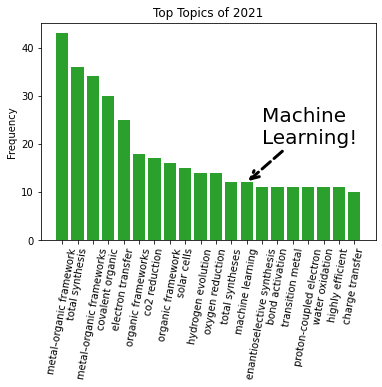

In [71]:
plt.bar(x = range(0,20), height = [freq for i, freq in Counter(bigrams).most_common(20)], color = 'C2')
plt.xticks(range(0,20),
          [' '.join(i) for i,freq in Counter(bigrams).most_common(20)],
          rotation = 80)
plt.title('Top Topics of 2021')
plt.ylabel('Frequency')
plt.annotate("Machine\nLearning!", xy = (12,12), xytext = (13,20),
             arrowprops = dict(arrowstyle = '->', linestyle = 'dashed', linewidth = 3),
             fontsize = '20', horizontalalignment = 'left')
plt.show()

작년 한 해 Machine Learning을 이용한 화학 연구도 활발하게 진행되었음.